## Importing Dataset

In [17]:
!wget https://cb.lk//covid_19

--2020-10-23 20:40:32--  https://cb.lk//covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-10-23 20:40:33--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-10-23 20:40:33--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce8baa49c4465bc026c829e58b5.dl.dropboxuser

In [18]:
## Unzip the data
!unzip covid_19

Archive:  covid_19
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [19]:
train_path = "CovidDataset/Train"
val_path = "CovidDataset/Val"

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

## CNN Model

In [39]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 128)      

In [41]:
## Compiling the model

model.compile(optimizer='adam',
              loss=keras.losses.binary_crossentropy,
              metrics = ['accuracy'])


## Data Generator for Training and Validation

In [42]:
train_data_generator = image.ImageDataGenerator(
    rescale = 1.0/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

val_data_generator = image.ImageDataGenerator(
    rescale = 1.0/255
)

In [43]:
train_gen = train_data_generator.flow_from_directory(
    directory = "CovidDataset/Train",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

val_gen = val_data_generator.flow_from_directory(
    directory = "CovidDataset/Val",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [44]:
hist = model.fit_generator(
    generator = train_gen,
    steps_per_epoch = 7,
    epochs = 20,
    validation_data = val_gen,
    validation_steps = 2
)

Epoch 1/20
7/7 [==============================] - 8s 1s/step - loss: 1.0728 - accuracy: 0.5670 - val_loss: 0.6660 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 0.6474 - accuracy: 0.6071 - val_loss: 0.6141 - val_accuracy: 0.8667
Epoch 3/20
7/7 [==============================] - 8s 1s/step - loss: 0.4911 - accuracy: 0.8036 - val_loss: 0.3334 - val_accuracy: 0.9333
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.3369 - accuracy: 0.8527 - val_loss: 0.2585 - val_accuracy: 0.9500
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 0.2507 - accuracy: 0.9062 - val_loss: 0.1497 - val_accuracy: 0.9333
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 0.3041 - accuracy: 0.8884 - val_loss: 0.1493 - val_accuracy: 0.9667
Epoch 7/20
7/7 [==============================] - 8s 1s/step - loss: 0.1912 - accuracy: 0.9509 - val_loss: 0.1052 - val_accuracy: 0.9667
Epoch 8/20
7/7 [=========================

In [45]:
h = hist.history

In [46]:
idx = np.argmax(h['val_accuracy'])
print(idx)

9


In [47]:
print(h['val_accuracy'][idx])
print(h['accuracy'][idx])

0.9833333492279053
0.9508928656578064


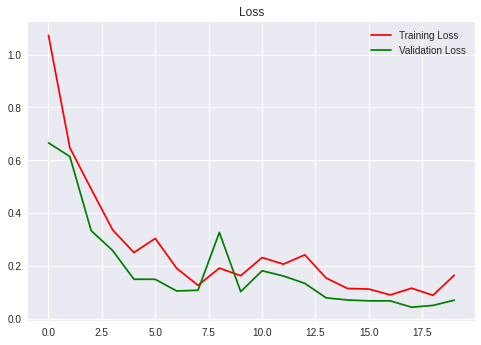

In [48]:
## Loss
plt.style.use('seaborn')
plt.plot(h['loss'], c="red", label='Training Loss')
plt.plot(h['val_loss'], c="green", label='Validation Loss')
plt.title("Loss")
plt.legend()
plt.show()

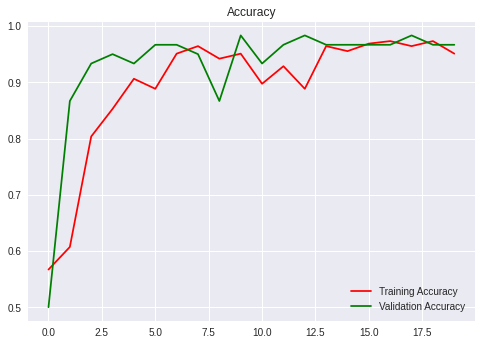

In [49]:
## Accuracy
plt.plot(h['accuracy'], c="red", label='Training Accuracy')
plt.plot(h['val_accuracy'], c="green", label='Validation Accuracy')
plt.title("Accuracy")
plt.legend()
plt.show()